## Social Network SQL Database Visualization

## Huy Mai

----------------------------------------------------

Import all modules to be used.

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np

import folium
from folium import plugins

## Establish a connection to a new database with the filename socialNetwork.db.

In [2]:
#create a string to save the database to the path on my computer.
db_name = 'socialNetwork.db'
db_path = '../social-network-sql/' + db_name

Create the connection object _conn_ for socialNetwork.db through SQLite.

In [3]:
conn = sql.connect(db_path)

----------------------------------------------------

## E-R Diagram and Relational Model for socialNetwork.db.


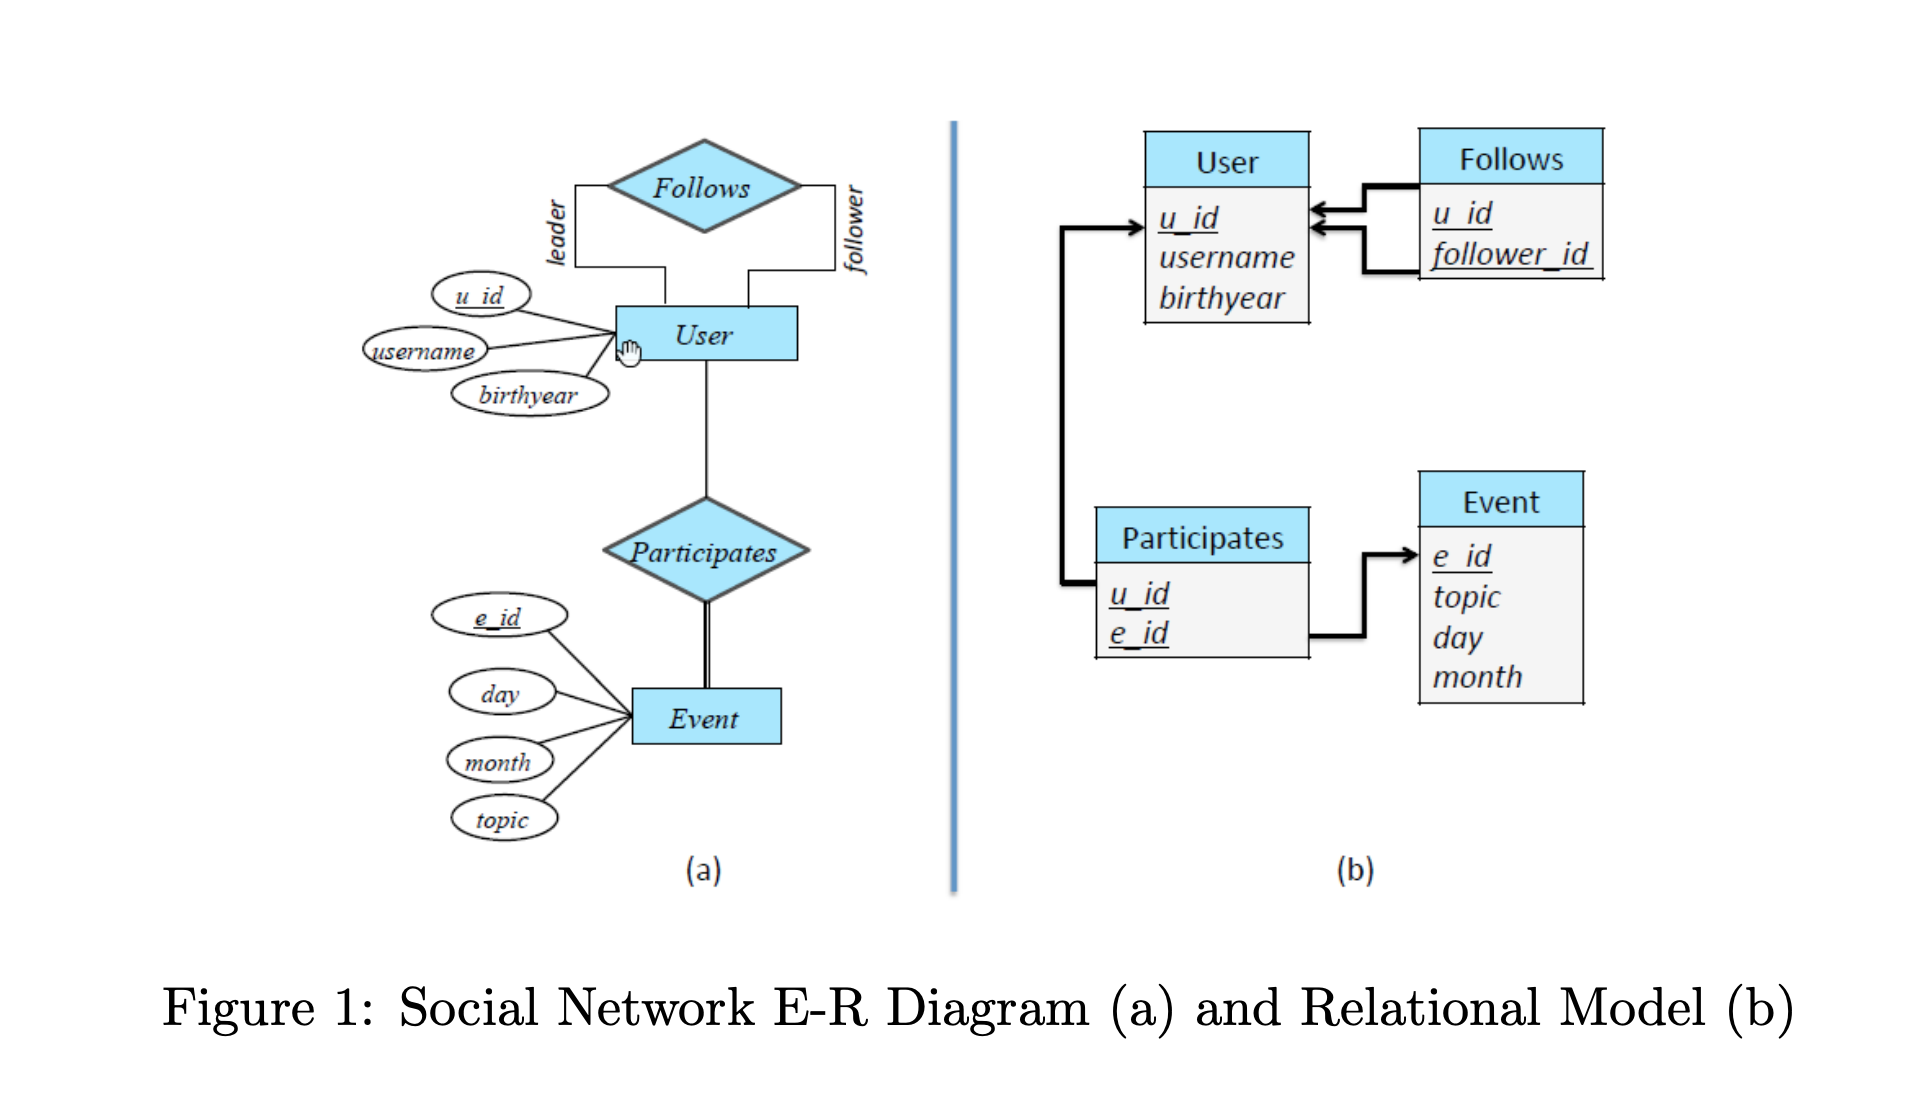

In [4]:
# Drop all the tables if running multiple times.
cursor = conn.execute( 'DROP TABLE IF EXISTS user;' )
cursor = conn.execute( 'DROP TABLE IF EXISTS follows;')
cursor = conn.execute( 'DROP TABLE IF EXISTS participates;')
cursor = conn.execute( 'DROP TABLE IF EXISTS event;')

----------------------------------------------------

# Create Tables

#### Create Table User

In [5]:
create_table_query =  'CREATE TABLE user ( '
create_table_query += ' u_id integer primary key autoincrement, '  
create_table_query += ' username varchar (15) UNIQUE NOT NULL, ' # username has to be unique and not null (ex. twitter handle)
create_table_query += ' birthyear integer CHECK (birthyear < 2007) ' # minimum age to sign up to a social network is usually 13 years old
create_table_query += ');'
print(create_table_query)

# Create User table and commit to the database.
cursor = conn.execute(create_table_query)
conn.commit()

CREATE TABLE user (  u_id integer primary key autoincrement,  username varchar (15) UNIQUE NOT NULL,  birthyear integer CHECK (birthyear < 2007) );


Check to see if User table was created.

In [6]:
query = "SELECT * FROM user;"
df = pd.read_sql_query(query, conn)

In [7]:
df

,u_id,username,birthyear


#### Create Table Follows

In [8]:
create_table_query =  'CREATE TABLE follows ( '
create_table_query += ' u_id, follower_id integer, '
create_table_query += ' foreign key(u_id) references user(u_id), '
create_table_query += ' foreign key(follower_id) references user(u_id));'
print(create_table_query)

# Create Follows table and commit to the database.
cursor = conn.execute(create_table_query)
conn.commit()

CREATE TABLE follows (  u_id, follower_id integer,  foreign key(u_id) references user(u_id),  foreign key(follower_id) references user(u_id));


Check to see if Follows table was created.

In [9]:
query = "SELECT * FROM follows;"
df = pd.read_sql_query(query, conn)

In [10]:
df

,u_id,follower_id


#### Create Table Event

In [11]:
create_table_query =  'CREATE TABLE event ( '
create_table_query += ' e_id integer primary key autoincrement, '
create_table_query += ' topic varchar (64), ' # Topic is a string for what event occurred.
create_table_query += ' day integer CHECK ((day > 0) AND (day <= 31)), ' # Valid day
create_table_query += ' month integer CHECK ((month > 0) AND (month <= 12)) ' # Valid month
create_table_query += ');'
print(create_table_query)

# Create Event table and commit to the database.
cursor = conn.execute(create_table_query)
conn.commit()

CREATE TABLE event (  e_id integer primary key autoincrement,  topic varchar (64),  day integer CHECK ((day > 0) AND (day <= 31)),  month integer CHECK ((month > 0) AND (month <= 12)) );


In [12]:
query = "SELECT * FROM event;"
df = pd.read_sql_query(query, conn)

In [13]:
df

,e_id,topic,day,month


#### Create Table Participates

In [14]:
create_table_query =  'CREATE TABLE participates ( '
create_table_query += ' u_id, e_id integer, '
create_table_query += ' foreign key(u_id) references user(u_id), '
create_table_query += ' foreign key(e_id) references event(e_id));'
print(create_table_query)

# Create Participates table and commit to the database.
cursor = conn.execute(create_table_query)
conn.commit()

CREATE TABLE participates (  u_id, e_id integer,  foreign key(u_id) references user(u_id),  foreign key(e_id) references event(e_id));


In [15]:
query = "SELECT * FROM participates;"
df = pd.read_sql_query(query, conn)

In [16]:
df

,u_id,e_id


------------------------------------------------------

# Insert DATA in the tables

## Insert data into User table (5 records)

Create a list of random first names and last names.

In [17]:
rand_fnames = ['Liam', 'Emma', 'Noah', 'Olivia', 'William', 'Ava', 'James', 
         'Isabella', 'Oliver', 'Sophia', 'Benjamin', 'Charlotte', 
         'Elijah', 'Mia', 'Lucas', 'Amelia', 'Mason', 'Harper', 
         'Logan', 'Evelyn', 'Alexander', 'Abigail', 'Ethan', 'Emily', 
         'Jacob', 'Elizabeth', 'Michael', 'Mila', 'Daniel', 'Ella', 
         'Henry', 'Avery', 'Jackson', 'Sofia', 'Sebastian', 'Camila', 
         'Aiden', 'Aria', 'Matthew', 'Scarlett', 'Samuel', 'Victoria', 
         'David', 'Madison', 'Joseph', 'Luna', 'Carter', 'Grace', 
         'Owen', 'Chloe', 'Wyatt', 'Penelope', 'John', 'Layla', 'Jack', 
         'Riley', 'Luke', 'Zoey', 'Jayden', 'Nora', 'Dylan', 'Lily', 
         'Grayson', 'Eleanor', 'Isaac', 'Lillian', 'Gabriel', 'Addison', 
         'Julian', 'Aubrey', 'Mateo', 'Ellie', 'Anthony', 'Stella', 
         'Jaxon', 'Natalie', 'Lincoln', 'Zoe', 'Joshua', 'Leah', 
         'Christopher', 'Hazel', 'Andrew', 'Violet', 'Theodore', 'Aurora', 
         'Caleb', 'Savannah', 'Ryan', 'Audrey', 'Asher', 'Brooklyn', 'Nathan', 
         'Bella', 'Thomas', 'Claire', 'Leo', 'Skylar', 'Nolan', 'Naomi']

In [18]:
rand_lnames = ['Ferguson', 'Olson', 'Blankenship', 'Mejia', 'Ayers', 'Flores',
         'Reyes', 'Thornton', 'Cantu', 'Charles', 'Floyd', 'Figueroa', 'Escobar',
         'Ellis', 'Fowler', 'Mcneil', 'Oneill', 'Chan', 'Villegas', 'Juarez',
         'Walton', 'Rivers', 'Rojas', 'Bowers', 'Parsons', 'Camacho', 'Daniels',
         'Schneider', 'Fitzgerald', 'Morse', 'Boyer', 'Lamb', 'Chen', 'Valenzuela',
         'Blackwell', 'Bradley', 'Davidson', 'Thomas', 'Barber', 'Wyatt', 'Hatfield',
         'Gross', 'Spencer', 'Barnes', 'Rosales', 'Robinson', 'Beck', 'Serrano',
         'Kirby', 'Conway', 'Duarte', 'Vance', 'Grimes', 'Logan', 'Kirk',
         'Hart', 'Clements', 'Pierce', 'Valencia', 'Landry', 'Cervantes', 'Jarvis',
         'English', 'Wallace', 'Byrd', 'Duncan', 'Campos', 'Howell', 'Richardson',
         'Sanchez', 'Harrington', 'Hansen', 'Davila', 'Cherry', 'Cole', 'Bradford',
         'Singleton', 'Kidd', 'Sellers', 'Stephenson', 'Blanchard', 'Marsh', 'Becker',
         'Holder', 'Chavez', 'Hogan', 'Oliver', 'Odom', 'Cobb', 'Blevins',
         'Doyle', 'Cohen', 'Barr', 'Kerr', 'Burnett', 'Franklin', 'Benjamin',
         'Mahoney', 'Mendez', 'Vincent']

In [19]:
# Generate 5 random users

num_of_users = 5

for i in range(num_of_users):
    
    f_name = np.random.choice(rand_fnames) # choose randomly from first names list
    l_name = np.random.choice(rand_lnames) # choose randomly from last names list

    
    random_year = np.random.randint(1950,2007) # people born on 2007 are 13 years old 
    birthyear = str(random_year) 
   
    username = f_name + l_name + birthyear # username is their full name plus the year which they were born
    
    insert_data_query = """
       INSERT INTO user (username, birthyear) VALUES (
         '{:s}', {:s});
    """
    
    insert_data_query = insert_data_query.format(username, birthyear)
    
    try:
        cursor = conn.execute( insert_data_query )
    except sql.Error as err:
        print(err)
        
conn.commit()

Check to see if data is added to User table.

In [20]:
query = "SELECT * FROM user;"
result = conn.execute( query )

result.fetchall()

[(1, 'OliviaKirk1975', 1975),
 (2, 'MilaSingleton1972', 1972),
 (3, 'SavannahBradley1983', 1983),
 (4, 'ChloeValencia1994', 1994),
 (5, 'AidenKirk1953', 1953)]

## Insert data into Event table (5 records)

Create a list of events

In [21]:
rand_events = ['Zumba', 'Canoeing', 'Photography', 'Tennis', 'Fishing', 'Cross-fit', 'Paragliding', 
         'Windsurfing', 'Video Games', 'Sculpting', 'Golf', 'Darts', 
         'Weight Lifting', 'Sewing', 'Diving', 'Hiking', 'Martial Arts', 'Boxing', 
         'Bowling', 'Paintball']

In [22]:
# Generate 5 random events

num_of_events = 5

for i in range(num_of_events):
    
    topic = np.random.choice(rand_events)
    
    random_day = np.random.randint(1,28)  # all days are 1-28 to prevent checking for 30 or 31 days
    day = str(random_day) # Must convert numbers to strings to append them to other strings with '+'.

    random_month = np.random.randint(1,12) # choose between from the 12 months of the year
    month = str(random_month) # Must convert numbers to strings to append them to other strings with '+'.


    insert_data_query = """
       INSERT INTO event (topic, day, month) VALUES (
         '{:s}', {:s}, {:s});
    """
    
    insert_data_query = insert_data_query.format(topic, day, month)
   
    try:
        cursor = conn.execute( insert_data_query )
    except sql.Error as err:
        print(err)

conn.commit()

Check to see if data is added to Event table.

In [23]:
query = "SELECT * FROM event;"
result = conn.execute( query )

result.fetchall()

[(1, 'Fishing', 14, 11),
 (2, 'Cross-fit', 15, 4),
 (3, 'Weight Lifting', 8, 4),
 (4, 'Paragliding', 1, 4),
 (5, 'Zumba', 12, 11)]

## Insert 15 random pairs of (user id, event id) in the table Participates. 

In [24]:
# gather list of all user ids
query = "SELECT u_id FROM user;"
result = conn.execute( query )
u_ids = result.fetchall()
u_ids = [u[0] for u in u_ids]
print(u_ids)

[5, 4, 2, 1, 3]


In [25]:
# gather list of all event ids
query = "SELECT e_id FROM event;"
result = conn.execute( query )
e_ids = result.fetchall()
e_ids = [e[0] for e in e_ids]
print(e_ids)

[1, 2, 3, 4, 5]


In [26]:
# Inserts 15 random pairs of u_id and e_id into participates table
num_of_pairs = 15

for i in range(num_of_pairs):
    
    u_id = np.random.choice(u_ids) # choose randomly from u_ids
    e_id = np.random.choice(e_ids) # choose randomly from e_ids
    
    insert_data_query = """
       INSERT INTO participates (u_id, e_id) VALUES (
         {:d}, {:d});
    """
    insert_data_query = insert_data_query.format(u_id, e_id)
    
    try:
        cursor = conn.execute( insert_data_query )
    except sql.Error as err:
        print(err)

Check to see if random pairs is inserted into Participates table

In [27]:
query = "SELECT * FROM participates;"
result = conn.execute( query )
result.fetchall()

[(5, 5),
 (5, 1),
 (4, 1),
 (2, 1),
 (4, 2),
 (1, 1),
 (3, 1),
 (3, 2),
 (2, 4),
 (1, 1),
 (5, 4),
 (3, 3),
 (2, 5),
 (5, 4),
 (3, 3)]

In [28]:
query = "SELECT * FROM participates;"
df = pd.read_sql_query(query, conn)
df

,u_id,e_id
0,5,5
1,5,1
2,4,1
3,2,1
4,4,2
5,1,1
6,3,1
7,3,2
8,2,4
9,1,1


In [29]:
conn.commit()

------------------------------------------------------

# Query that returns the username and birthyear of a user, as well as the event topic, day and month, for all the users that participated in events.

Submit a query to the socialNetwork database.

In [30]:
query = 'SELECT username, birthyear, topic, day, month ' 
query +='FROM user NATURAL JOIN participates NATURAL JOIN event;'
result = conn.execute( query )

# Fetch all the tuples of the result of the above query with 1 command, and print them.

In [31]:
print( result.fetchall() )

[('AidenKirk1953', 1953, 'Zumba', 12, 11), ('AidenKirk1953', 1953, 'Fishing', 14, 11), ('ChloeValencia1994', 1994, 'Fishing', 14, 11), ('MilaSingleton1972', 1972, 'Fishing', 14, 11), ('ChloeValencia1994', 1994, 'Cross-fit', 15, 4), ('OliviaKirk1975', 1975, 'Fishing', 14, 11), ('SavannahBradley1983', 1983, 'Fishing', 14, 11), ('SavannahBradley1983', 1983, 'Cross-fit', 15, 4), ('MilaSingleton1972', 1972, 'Paragliding', 1, 4), ('OliviaKirk1975', 1975, 'Fishing', 14, 11), ('AidenKirk1953', 1953, 'Paragliding', 1, 4), ('SavannahBradley1983', 1983, 'Weight Lifting', 8, 4), ('MilaSingleton1972', 1972, 'Zumba', 12, 11), ('AidenKirk1953', 1953, 'Paragliding', 1, 4), ('SavannahBradley1983', 1983, 'Weight Lifting', 8, 4)]


In [32]:
df = pd.read_sql_query(query, conn)
df

,username,birthyear,topic,day,month
0,AidenKirk1953,1953,Zumba,12,11
1,AidenKirk1953,1953,Fishing,14,11
2,ChloeValencia1994,1994,Fishing,14,11
3,MilaSingleton1972,1972,Fishing,14,11
4,ChloeValencia1994,1994,Cross-fit,15,4
5,OliviaKirk1975,1975,Fishing,14,11
6,SavannahBradley1983,1983,Fishing,14,11
7,SavannahBradley1983,1983,Cross-fit,15,4
8,MilaSingleton1972,1972,Paragliding,1,4
9,OliviaKirk1975,1975,Fishing,14,11


------------------------------------------------------

# Modify the table User to include user’s location (Add 2 attributes: uLat, uLon).

### User : 
#### Add columns for latitude and longitude:

In [33]:
# Latitude
query = 'ALTER TABLE user ADD COLUMN uLat float;'
cursor = conn.execute( query )

In [34]:
# Longitude
query = 'ALTER TABLE user ADD COLUMN uLon float;'
cursor = conn.execute( query )

# Modify the table Event to include the events’ location (Add 2 attributes: eLat, eLon).

### Event : 
#### Add columns for latitude and longitude:

In [35]:
# Latitude
query = 'ALTER TABLE event ADD COLUMN eLat float;'
cursor = conn.execute( query )

In [36]:
# Longitude
query = 'ALTER TABLE event ADD COLUMN eLon float;'
cursor = conn.execute( query )

# Query the DB to show all tuples of User in a pandas DataFrame df_u. Show Repeat the same for Event, with a DataFrame df_e.

## User DataFrame

In [37]:
df_u = pd.read_sql_query('SELECT * FROM user;', conn)
df_u

,u_id,username,birthyear,uLat,uLon
0,1,OliviaKirk1975,1975,None,None
1,2,MilaSingleton1972,1972,None,None
2,3,SavannahBradley1983,1983,None,None
3,4,ChloeValencia1994,1994,None,None
4,5,AidenKirk1953,1953,None,None


## Event DataFrame

In [38]:
df_e = pd.read_sql_query('SELECT * FROM event;', conn)
df_e

,e_id,topic,day,month,eLat,eLon
0,1,Fishing,14,11,None,None
1,2,Cross-fit,15,4,None,None
2,3,Weight Lifting,8,4,None,None
3,4,Paragliding,1,4,None,None
4,5,Zumba,12,11,None,None


There are __None__ values underneath the latitude and longitude columns of both User and Event dataframes. This is because no values have been inserted into the tables for latitude and longitude yet. The columns were just created.

------------------------------------------------------

# Insert random values for the latitude and longitude of each user.

In [39]:
u_ids = df_u['u_id']

for i in range(len(df_u)):
    # Generate random coordinates
    uLon = np.random.uniform(-117, -75)
    uLat = np.random.uniform(32, 45)
    
    # Round them to a precision of 3 decimal digits
    uLat = round(uLat, 3)
    uLon = round(uLon, 3)
    
    # Create the update query
    update_query  = 'UPDATE user SET '
    update_query += 'uLat = ' + str(uLat) + ', '
    update_query += 'uLon = ' + str(uLon) + ' '
    update_query += 'WHERE u_id = ' + str(u_ids[i]) + ';'
    
    # Print the query
    print(update_query)
    
    # Execute the query
    cursor = conn.execute( update_query )

UPDATE user SET uLat = 36.198, uLon = -100.621 WHERE u_id = 1;
UPDATE user SET uLat = 32.827, uLon = -75.204 WHERE u_id = 2;
UPDATE user SET uLat = 37.881, uLon = -96.558 WHERE u_id = 3;
UPDATE user SET uLat = 38.748, uLon = -88.492 WHERE u_id = 4;
UPDATE user SET uLat = 37.354, uLon = -75.961 WHERE u_id = 5;


In [40]:
conn.commit()

# Insert random values for the latitude and longitude of each event.

In [41]:
e_ids = df_e['e_id']
for i in range(len(df_e)):
    # Generate random coordinates
    eLon = np.random.uniform(-117, -75)
    eLat = np.random.uniform(32, 45)
    
    # Round them to a precision of 3 decimal digits
    eLat = round(eLat, 3)
    eLon = round(eLon, 3)
    
    # Create the update query
    update_query  = 'UPDATE event SET '
    update_query += 'eLat = ' + str(eLat) + ', '
    update_query += 'eLon = ' + str(eLon) + ' '
    update_query += 'WHERE e_id = ' + str(e_ids[i]) + ';'
    
    # Print the query
    print(update_query)
    
    # Execute the query
    cursor = conn.execute( update_query )

UPDATE event SET eLat = 44.935, eLon = -87.39 WHERE e_id = 1;
UPDATE event SET eLat = 33.508, eLon = -93.976 WHERE e_id = 2;
UPDATE event SET eLat = 33.052, eLon = -77.959 WHERE e_id = 3;
UPDATE event SET eLat = 35.149, eLon = -102.213 WHERE e_id = 4;
UPDATE event SET eLat = 36.981, eLon = -98.995 WHERE e_id = 5;


In [42]:
conn.commit()

---

# Query the DB again to show all tuples of User in a pandas DataFrame and show the contents of it. Repeat the same for Event.

## User DataFrame

In [43]:
df_u = pd.read_sql_query('SELECT * FROM user;', conn)
df_u

,u_id,username,birthyear,uLat,uLon
0,1,OliviaKirk1975,1975,36.198,-100.621
1,2,MilaSingleton1972,1972,32.827,-75.204
2,3,SavannahBradley1983,1983,37.881,-96.558
3,4,ChloeValencia1994,1994,38.748,-88.492
4,5,AidenKirk1953,1953,37.354,-75.961


## Event DataFrame

In [44]:
df_e = pd.read_sql_query('SELECT * FROM event;', conn)
df_e

,e_id,topic,day,month,eLat,eLon
0,1,Fishing,14,11,44.935,-87.390
1,2,Cross-fit,15,4,33.508,-93.976
2,3,Weight Lifting,8,4,33.052,-77.959
3,4,Paragliding,1,4,35.149,-102.213
4,5,Zumba,12,11,36.981,-98.995


In [45]:
# Commit all changes.
conn.commit()

---

# A join query that counts all the user names and locations of users, who attended an event, and the id and location of the event that is stored in df1.

In [46]:
# Create the query
query = 'SELECT username, uLat, uLon, e_id, eLat, eLon ' 
query +='FROM user NATURAL JOIN participates NATURAL JOIN event;'
result = conn.execute( query )

In [47]:
# Save the result in dataframe df1
df1 = pd.read_sql_query(query, conn)
df1

,username,uLat,uLon,e_id,eLat,eLon
0,AidenKirk1953,37.354,-75.961,5,36.981,-98.995
1,AidenKirk1953,37.354,-75.961,1,44.935,-87.390
2,ChloeValencia1994,38.748,-88.492,1,44.935,-87.390
3,MilaSingleton1972,32.827,-75.204,1,44.935,-87.390
4,ChloeValencia1994,38.748,-88.492,2,33.508,-93.976
5,OliviaKirk1975,36.198,-100.621,1,44.935,-87.390
6,SavannahBradley1983,37.881,-96.558,1,44.935,-87.390
7,SavannahBradley1983,37.881,-96.558,2,33.508,-93.976
8,MilaSingleton1972,32.827,-75.204,4,35.149,-102.213
9,OliviaKirk1975,36.198,-100.621,1,44.935,-87.390


# A query that counts the number of users who participate in each event and shows the event id and user count. The result is stored in the df2 dataframe.

In [48]:
# Create the query

query = 'SELECT count(username) AS \'Number of Users that Participated\', e_id '
query +='FROM user NATURAL JOIN participates NATURAL JOIN event '
query +='GROUP BY e_id'
query +=';'
result = conn.execute( query )

In [49]:
# Save the result in dataframe df2

df2 = pd.read_sql_query(query, conn)
df2

,Number of Users that Participated,e_id
0,6,1
1,2,2
2,2,3
3,3,4
4,2,5


---

# Calculates the harvesine distance between each user to the event(s) that they participate in, using the coordinates from the query result in df1. Then, the distance values are inserted in a new ‘dist’ column in df1.

Harvesine distance function (returns the distance in km)

In [50]:
def harvesine_dist(lat1, lon1, lat2, lon2):

    R = 6373.0 # approximate radius of earth in km

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance


Show again the dataframe with users and events combined with locations

In [51]:
df1

,username,uLat,uLon,e_id,eLat,eLon
0,AidenKirk1953,37.354,-75.961,5,36.981,-98.995
1,AidenKirk1953,37.354,-75.961,1,44.935,-87.390
2,ChloeValencia1994,38.748,-88.492,1,44.935,-87.390
3,MilaSingleton1972,32.827,-75.204,1,44.935,-87.390
4,ChloeValencia1994,38.748,-88.492,2,33.508,-93.976
5,OliviaKirk1975,36.198,-100.621,1,44.935,-87.390
6,SavannahBradley1983,37.881,-96.558,1,44.935,-87.390
7,SavannahBradley1983,37.881,-96.558,2,33.508,-93.976
8,MilaSingleton1972,32.827,-75.204,4,35.149,-102.213
9,OliviaKirk1975,36.198,-100.621,1,44.935,-87.390


Create a loop, to calculate each of the distances, for every tuple.

In [52]:
dist_list = [harvesine_dist(row['uLat'], row['uLon'], row['eLat'], row['eLon']) for index, row in df1.iterrows()]
    
# one line of code

Show dist_list

In [53]:
dist_list

[10869.798825397313,
 10308.338424190848,
 3689.962331785636,
 3014.682827680506,
 6078.296296941204,
 15725.103922630495,
 12659.84941232402,
 6130.433374139033,
 13427.264557490224,
 15725.103922630495,
 10984.628355186744,
 9254.667435464064,
 14292.056928047801,
 10984.628355186744,
 9254.667435464064]

Append dist column to the dataframe, with the corresponding distances that were calculated:

In [54]:
df1['dist'] = dist_list
df1

,username,uLat,uLon,e_id,eLat,eLon,dist
0,AidenKirk1953,37.354,-75.961,5,36.981,-98.995,10869.798825
1,AidenKirk1953,37.354,-75.961,1,44.935,-87.390,10308.338424
2,ChloeValencia1994,38.748,-88.492,1,44.935,-87.390,3689.962332
3,MilaSingleton1972,32.827,-75.204,1,44.935,-87.390,3014.682828
4,ChloeValencia1994,38.748,-88.492,2,33.508,-93.976,6078.296297
5,OliviaKirk1975,36.198,-100.621,1,44.935,-87.390,15725.103923
6,SavannahBradley1983,37.881,-96.558,1,44.935,-87.390,12659.849412
7,SavannahBradley1983,37.881,-96.558,2,33.508,-93.976,6130.433374
8,MilaSingleton1972,32.827,-75.204,4,35.149,-102.213,13427.264557
9,OliviaKirk1975,36.198,-100.621,1,44.935,-87.390,15725.103923


---

## Plots all the events on a map, as red circles. The size of the circle is proportional to the number of users who participate in the event.

## Plot all the users on the same map, as blue circles. The size of the circle is proportional to the age of the user.

Create an empty map. 

In [55]:
folium_map = folium.Map(location=[37.0902, -95.7129],  # USA coordinates
                            zoom_start=4,
                            tiles="openstreetmap")

folium_map

Update df2 to include eLat and eLon.

In [56]:
# Create the query

query = 'SELECT count(username) AS \'Number of Users that Participated\', e_id, eLat, eLon ' # includes latitude and longitude for the folium map
query +='FROM user NATURAL JOIN participates NATURAL JOIN event '
query +='GROUP BY e_id'
query +=';'
result = conn.execute( query )

In [57]:
# Save the result in dataframe df2

df2 = pd.read_sql_query(query, conn)
df2

,Number of Users that Participated,e_id,eLat,eLon
0,6,1,44.935,-87.390
1,2,2,33.508,-93.976
2,2,3,33.052,-77.959
3,3,4,35.149,-102.213
4,2,5,36.981,-98.995


Calculate age and add new age column to df_u.

In [58]:
df_u = pd.read_sql_query('SELECT *, 2020 - birthyear AS \'age\' FROM user;', conn)
df_u

,u_id,username,birthyear,uLat,uLon,age
0,1,OliviaKirk1975,1975,36.198,-100.621,45
1,2,MilaSingleton1972,1972,32.827,-75.204,48
2,3,SavannahBradley1983,1983,37.881,-96.558,37
3,4,ChloeValencia1994,1994,38.748,-88.492,26
4,5,AidenKirk1953,1953,37.354,-75.961,67


Show all events and users on the map. 

In [59]:
# Puts all events (red) on the map
for index, row in df2.iterrows():
    
    #color
    color= 'red'
    
    # add marker to the map. Radius is *3 to show the circle better. The circles are still proportional to the number of users who participated in the event.
    folium.CircleMarker(location= (row['eLat'], row['eLon']), weight=1, radius=row['Number of Users that Participated']*3, 
                        color=color, fill=True, fill_color= color).add_to(folium_map)

# Puts all users (blue) on the map
for index, row in df_u.iterrows():
    
    #color
    color = 'blue'
    
    # add marker to the map. Radius is /4 to make the circle smaller. The circles are still proportional to the age of the user.
    folium.CircleMarker(location= (row['uLat'], row['uLon']), weight=1, radius=row['age']/4, 
                        color=color, fill=True, fill_color= color).add_to(folium_map)

folium_map

## Add lines connecting a user with the events that they participated in. Show the map.

In [60]:
# use df1 because the dataframe contains both latitudes and longitudes for user and event individually.

for index, row in df1.iterrows():
    p1 = row['eLat'], row['eLon'] # point where event is
    p2 = row['uLat'], row['uLon'] # point where user is
    folium.PolyLine(locations=[p1, p2], opacity=0.4, weight = 2, color='green').add_to(folium_map)

folium_map

## Finally : Close the DB Connection

In [61]:
conn.close()